In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Практика проверки гипотез

## 1.
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [3]:
n = 100
F_H0 = stats.binom(n, 0.75)

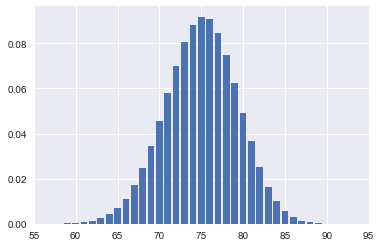

In [4]:
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
xlim(55, 95) 
pylab.show()

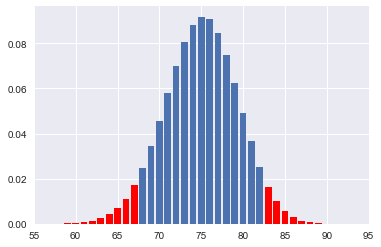

In [5]:
x = np.linspace(0,100,101)

pylab.bar(x, F_H0.pmf(x), align = 'center')
pylab.bar(np.linspace(0 ,67 ,68),   F_H0.pmf(np.linspace(0,67,68)), align = 'center', color = 'red')
pylab.bar(np.linspace(83,100,18), F_H0.pmf(np.linspace(83,100,18)), align = 'center', color = 'red')
xlim(55, 95) 
pylab.show()

In [6]:
stats.binom_test(67,100,0.75, alternative='two-sided')

0.082222588913866079

## 2
Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

In [7]:
stats.binom_test(44,100,0.75, alternative='two-sided')

5.1571289311031216e-11

## 3.
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

pines.txt

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('pines.txt', delimiter='\t')
df.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


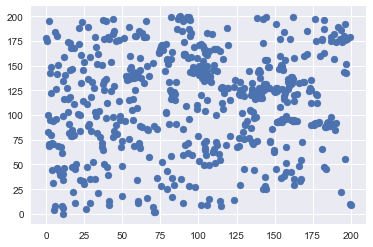

In [11]:
plt.scatter(df.sn,df.we)
plt.show()

In [96]:
?stats.binned_statistic_2d

In [113]:
tree_bins = stats.binned_statistic_2d(df['sn'], df['we'], None, 'count', 
                                      bins=[5,5])
tree_bins.statistic.mean()

23.359999999999999

## 4
Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [115]:
stats.chisquare(tree_bins.statistic)

Power_divergenceResult(statistic=array([  6.84745763,  13.30337079,  10.7761194 ,  15.88172043,  20.72413793]), pvalue=array([ 0.14417235,  0.00988478,  0.02919876,  0.00318205,  0.00035914]))

In [116]:
tree_bins.statistic

array([[ 18.,  26.,  29.,  25.,  20.],
       [ 14.,  12.,  22.,  34.,  25.],
       [ 12.,  24.,  15.,  50.,  37.],
       [  8.,  19.,  31.,  50.,   7.],
       [  7.,   8.,  37.,  27.,  27.]])

In [118]:
import itertools

In [125]:
tree_bins_flatten = list(itertools.chain.from_iterable(tree_bins.statistic))
stats.chisquare(tree_bins_flatten, ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.5746697749672791e-20)

In [126]:
from cross_val_custom import cross_validation_score_statement

ImportError: No module named cross_val_custom